In [1]:
%%capture
from IPython.display import display, Math, Latex
%pylab inline

We now try to sample using Jeff's idea: 

Starting with a dataset as in the "exact" method, this time we want to sample directly at the parameter level. 

We proceed as follows: 
- The first step is to propose some parameters set $\Omega_0$, and generate a power spectrum $C_{0}$ with $\texttt{CAMB}$.
- We then solve the CG equations (see 2004 paper) to get the mean field map: $\hat{s}_0$, the fluctuation map : $f^{GS}_0$.
- Next step, we generate a new parameter sample, $\Omega_1$, from which we get a power spectrum $C_1$. We then define a deterministicly rescaled fluctuation map: $f_1 = \sqrt{\frac{C_1}{C_0}} \; f^{GS}_0$. 
- ...
- Step i : Set $C_{i} = C_{i-1} $, and $\hat{s}_{i} = \hat{s}_{i-1}$. Generate fluctuation map $f^{GS}_i$. 
- Step i+1 : generate $\Omega_{i+1}$, and coresponding spectrum $C_{i+1}$. Set $f_{i+1} = \sqrt{\frac{C_{i+1}}{C_{i}}} \; f^{GS}_i$, and generate $\hat{s}_{i+1}$.


Calculate: A = min[1,$\frac{e^{-\frac{1}{2} (d- A \hat{s}_{i+1}) N^{-1} (d- A \hat{s}_{i+1})} }{e^{-\frac{1}{2} (d- A \hat{s}_{i}) N^{-1} (d- A \hat{s}_{i})}}  \frac{e^{-\frac{1}{2}  \hat{s}_{i+1} C_{i+1}^{-1} \hat{s}_{i+1}} }{e^{-\frac{1}{2}  \hat{s}_{i} C_{i}^{-1} \hat{s}_{i}}} \frac{e^{-\frac{1}{2}  {f}_{i+1} (AN^{-1}A) {f}_{i+1} }} {e^{-\frac{1}{2}  {f}^{GS}_{i} (AN^{-1}A) {f}^{GS}_{i} } } $]


Statistics and triangle plots are shown below. 

dataset read
0
1
2
3
4
5
$\Omega_b h^2$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted
$\Omega_c h^2$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted
$\tau$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted
$A_s$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted
$n_s$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted
$H_0$ : 0.75 rejected; 0.10 accepted; 0.16 Lucky accepted


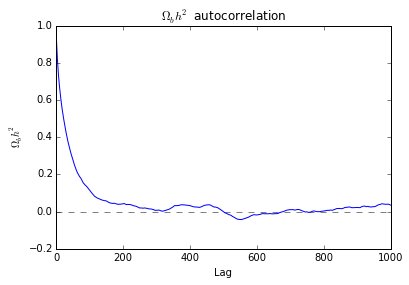

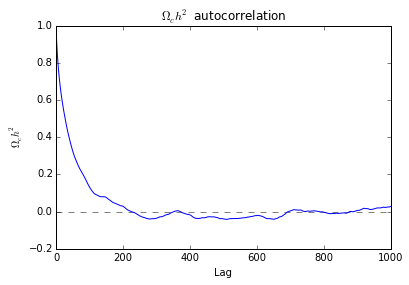

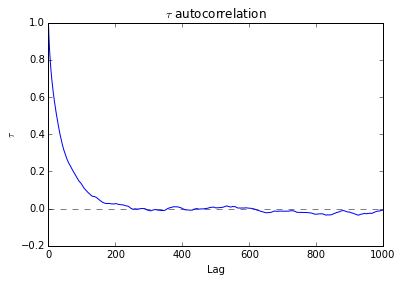

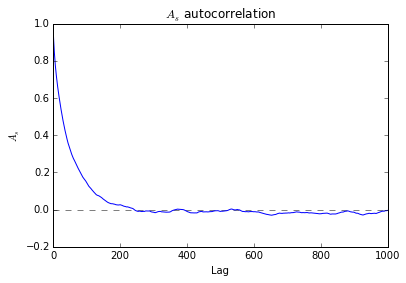

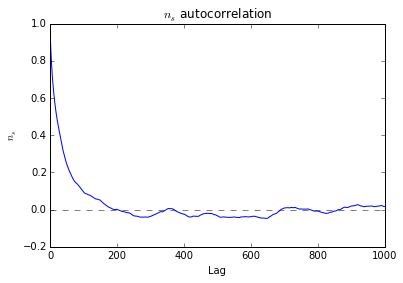

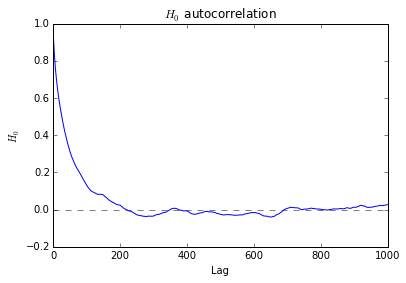

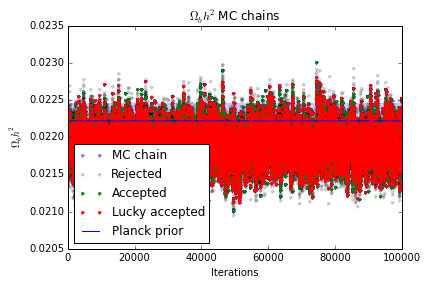

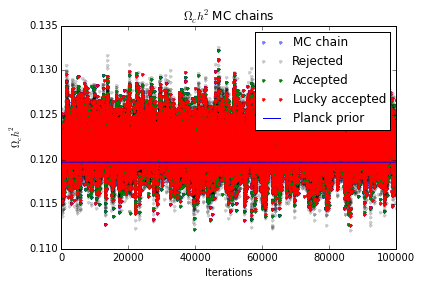

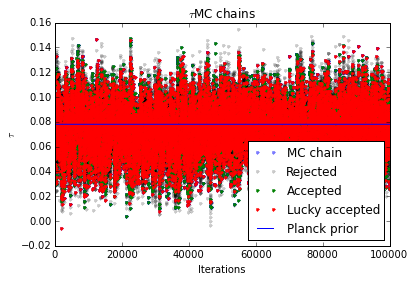

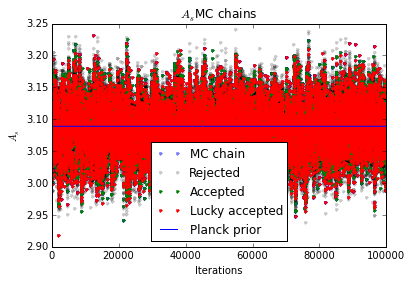

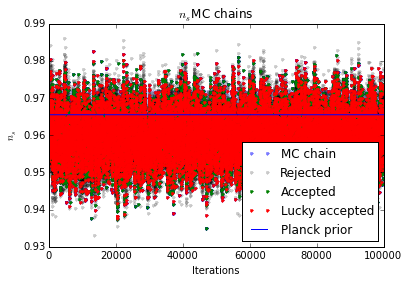

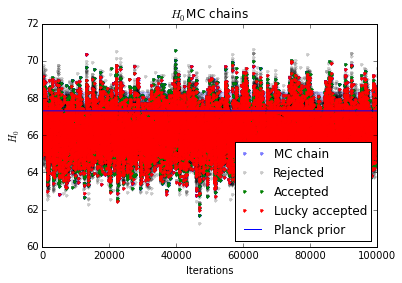

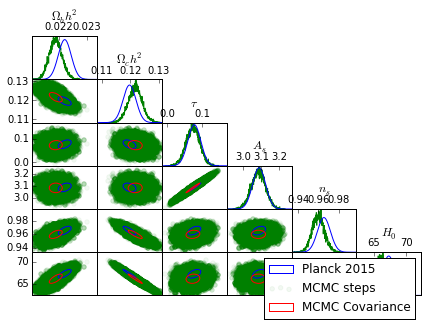

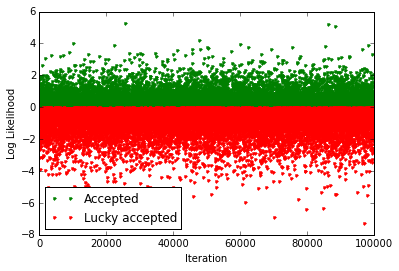

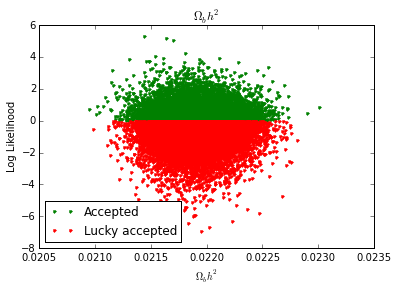

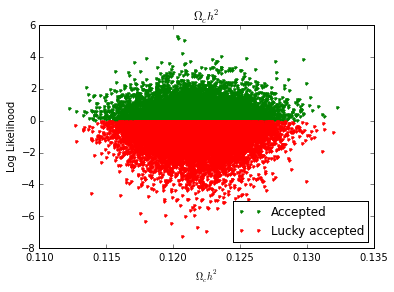

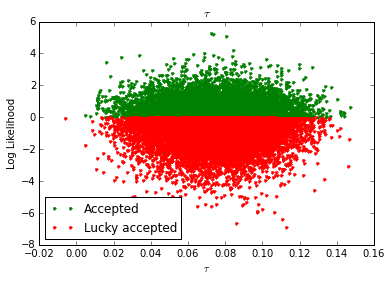

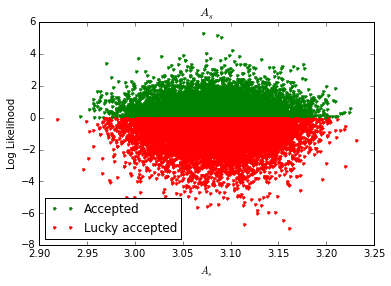

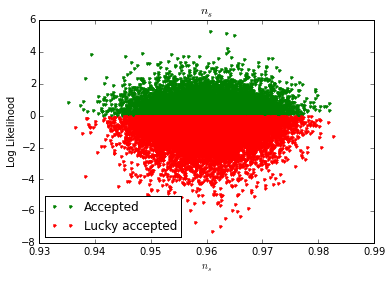

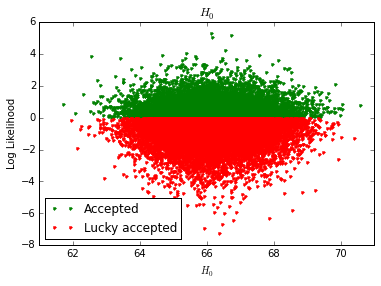

In [4]:
%run MH_MCMC_Jeff_idea.py
chain_Jji = np.load("chain_Jji_newprior_1_012345_68986_100000.npy")
import ploter_parameters as plp
plp.plot_all(chain_Jji[:4],titles,[0,1,2,3,4,5],x_mean, cov_new, burnin_cut=50)
plt.show()

As we can see, the acceptance rate is lower than in the "exact case" and the correlation length longer. The triangle plot seems ok, but we need a better comparison to check if the two methods give similar results. 

Next plots show direct comparison at the marginals level.

|                       |   $\Omega_b h^2$ |   $\Omega_c h^2$ |      $\tau$ |       $A_s$ |       $n_s$ |      $H_0$ |
|:----------------------|-----------------:|-----------------:|------------:|------------:|------------:|-----------:|
| mean chain 1          |      0.0219037   |       0.121669   |  0.0733421  |  3.08382    |  0.959968   | 66.1946    |
| mean chain 2          |      0.0219007   |       0.12169    |  0.0739808  |  3.08504    |  0.959917   | 66.1676    |
| std chain 1           |      0.000260334 |       0.00291478 |  0.0212138  |  0.041905   |  0.00692771 |  1.26793   |
| std chain 2           |      0.000231551 |       0.00247182 |  0.0198073  |  0.0393348  |  0.0061419  |  1.07478   |
| std : chain 1/chain 2 |      1.1243      |       1.17921    |  1.07101    |  1.06534    |  1.12794    |  1.17971   |
| skew : chain 1        |      0.0229533   |       0.119121   |  0.00739875 |  0.00263481 | -0.0396335  | -0.0194414 |
| skew : chain 2        |      0.102498    |    

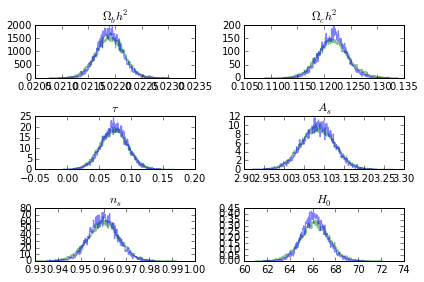

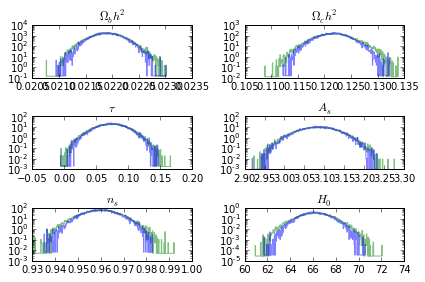

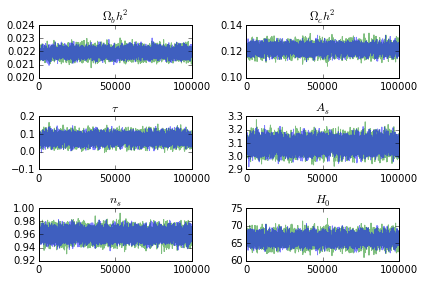

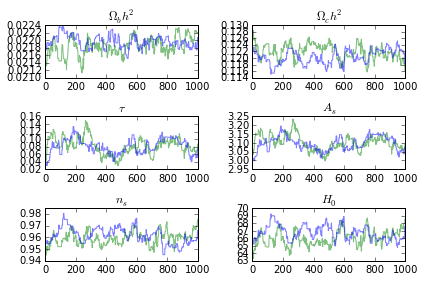

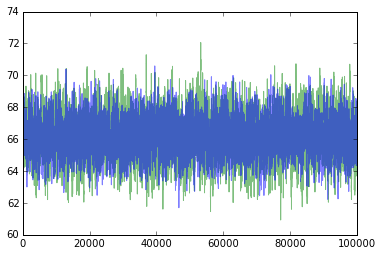

In [23]:
#%%capture
chain_exact = np.load("chain_exact_4_012345_19266_100000.npy")
plp.compare_chains(chain_exact,chain_Jji[:4],format_table="pipe")
plt.show()
## green is the exact chain, blue the "new"


As we can see, the exact method "suffers" from heavy tails and has a higher variance. Here are the mean values and std for a more quantitative comparison.



|                       |   $\Omega_b h^2$ |   $\Omega_c h^2$ |      $\tau$ |       $A_s$ |       $n_s$ |      $H_0$ |
|:----------------------|-----------------:|-----------------:|------------:|------------:|------------:|-----------:|
| mean chain 1          |      0.0219037   |       0.121669   |  0.0733421  |  3.08382    |  0.959968   | 66.1946    |
| mean chain 2          |      0.0219007   |       0.12169    |  0.0739808  |  3.08504    |  0.959917   | 66.1676    |
| std chain 1           |      0.000260334 |       0.00291478 |  0.0212138  |  0.041905   |  0.00692771 |  1.26793   |
| std chain 2           |      0.000231551 |       0.00247182 |  0.0198073  |  0.0393348  |  0.0061419  |  1.07478   |
| std : chain 1/chain 2 |      1.1243      |       1.17921    |  1.07101    |  1.06534    |  1.12794    |  1.17971   |
| skew : chain 1        |      0.0229533   |       0.119121   |  0.00739875 |  0.00263481 | -0.0396335  | -0.0194414 |
| skew : chain 2        |      0.102498    |       0.0157769  | -0.0165087  | -0.0395899  |  0.0360052  |  0.0717084 |
| kurt : chain 1        |      2.43236e-05 |       0.15004    | -0.103765   | -0.120431   |  0.0675265  |  0.0968369 |
| kurt : chain 2        |      0.0809004   |       0.0892654  | -0.0194443  | -0.0580861  |  0.00626539 |  0.0625944 |

#Check

A basic check of our new idea is to propose using the exact chains, i.e. from 

$w(\Omega_{i+1}) = \frac{e^{-\frac{1}{2} d (\;A S(\Omega)_i A^T + N\;)^{-1} d^T} }{\sqrt{2\pi \; \vert \; A S(\Omega)_i A^T + N \; \vert }}$. 


For that, we use the chains generated with the "exact method".

We then plug these in the "new" algorithm, i.e.:
- Choose $\Omega_i$ in the chain.
- Compute $\hat{s}_{i}$, sample $f_i$ (Gibbs step: generate $\omega_0$ and $\omega_1$ etc..)
- Choose $\Omega_j$ in the chain (j$\ne$i)
- Compute $\hat{s}_{j}$, and get the deterministic $f_j = \sqrt{\frac{A^T N^{-1} A + C^{-1}(\Omega)_i}{A^T N^{-1} A + C^{-1}(\Omega)_j}} f_i$ 


The target distribution is $\Pi(\Omega_{i+1} \vert d) = e^{-\frac{1}{2} (d- A \hat{s}_{i+1}) N^{-1} (d- A \hat{s}_{i+1}) - \frac{1}{2} \hat{s}_{i+1} C^{-1}_{i+1} \hat{s}_{i+1}-\frac{1}{2}  {f}_{i+1} (AN^{-1}A) {f}_{i+1} } $, 


After simplfications, and balance, we showed at some point that :

A = min$[1,\frac{\Pi(\Omega_{i+1} \vert d)}{\Pi(\Omega_{i} \vert d)} \frac{w(\Omega_{i})}{w(\Omega_{i+1})} ]$

reduces to :

A = min$[1,\frac{e^{-\frac{1}{2} (d- A \hat{s}_{j}) N^{-1} (d- A \hat{s}_{j}) - \frac{1}{2} \hat{s}_{j} C^{-1}_{j} \hat{s}_{j}}}{e^{-\frac{1}{2} (d- A \hat{s}_{i}) N^{-1} (d- A \hat{s}_{i}) - \frac{1}{2} \hat{s}_{i} C^{-1}_{i} \hat{s}_{i}}} \frac{e^{-\frac{1}{2} d (\;A S(\Omega)_i A^T + N\;)^{-1} d^T}}{e^{-\frac{1}{2} d (\;A S(\Omega)_j A^T + N\;)^{-1} d^T}}]$

We then check that it is unity.

MY ISSUE HERE IS THAT WITH THIS NEW RESCALING, WE WILL ALWAYS GET A=1, EVEN FOR RANDOM JUMPS, RIGHT? 
I MEAN $(d- A \hat{s}) N^{-1} (d- A \hat{s}) - \hat{s}_{i} C^{-1}_{i} \hat{s}_{i} = d (\;A S(\Omega)_j A^T + N\;)^{-1} d^T$ IS NOT DEPENDENT ON THE CHOICE OF THE PARAMETERS, SEE (A11) OF YOUR NOTES..






In [12]:
%run check_newidea.py

dataset read
[  2.23044023e-02   1.19671703e-01   8.27326325e-02   3.09335396e+00
   9.64101550e-01   6.72617721e+01]
[  2.23006415e-02   1.22539216e-01   1.02082573e-01   3.14337444e+00
   9.64395839e-01   6.61750055e+01]
(log) i+1 term =  1.42026692629e-08
(log) i term   =  -3.72529029846e-09
log(A) =  1.79279595613e-08


Being then compared to a uniform random number between 0 and 1, we effectively have a unit acceptance. 


Using the usual rescaling: 
$f_{j} = \sqrt{\frac{C_{i+1}}{C_{i}}} \; f^{GS}_i$, we have the acceptance rate:

A = min$[1,\frac{e^{-\frac{1}{2} (d- A \hat{s}_{j}) N^{-1} (d- A \hat{s}_{j}) - \frac{1}{2} \hat{s}_{j} C^{-1}_{j} \hat{s}_{j}-\frac{1}{2}  {f}_{j} (AN^{-1}A) {f}_{j}}}{e^{-\frac{1}{2} (d- A \hat{s}_{i}) N^{-1} (d- A \hat{s}_{i}) - \frac{1}{2} \hat{s}_{i} C^{-1}_{i} \hat{s}_{i}-\frac{1}{2}  f^{GS}_{i} (AN^{-1}A) f^{GS}_{i}}} \frac{e^{-\frac{1}{2} d (\;A S(\Omega)_i A^T + N\;)^{-1} d^T}}{e^{-\frac{1}{2} d (\;A S(\Omega)_j A^T + N\;)^{-1} d^T}} * \frac{\sqrt{2\pi \; \vert \; A S(\Omega)_j A^T + N \; \vert }}{\sqrt{2\pi \; \vert \; A S(\Omega)_i A^T + N \; \vert }}]$, 

Dont we? I am not sure, there might be some renormalization factors (Detereminants etc) that don't cancel anymore, I am not at all clear on how to do the balance thingy..
Then, A is :


In [16]:
Likediff_Ji - Likediff_ex

24.125471411272883

Another test we can do then, is to compare the value of the likelihoods for a 1D-grid of values.



The idea here is to test how different the likelihoods are, to assess the issue of the difference between the 2 algorithm. 

For that, we take the best fit value for all parameters from a chain and vary only one parameter, say $\Omega_c h^2$. We grid N value centered on the best fit, with variations from $-5\sigma$ to $5\sigma$.

We fix i at the best fit, and chose j in the grid. We then compare:

$\frac{e^{-\frac{1}{2} (d- A \hat{s}_{j}) N^{-1} (d- A \hat{s}_{j}) - \frac{1}{2} \hat{s}_{j} C^{-1}_{j} \hat{s}_{j}-\frac{1}{2}  {f}_{j} (AN^{-1}A) {f}_{j}}}{e^{-\frac{1}{2} (d- A \hat{s}_{i}) N^{-1} (d- A \hat{s}_{i}) - \frac{1}{2} \hat{s}_{i} C^{-1}_{i} \hat{s}_{i}-\frac{1}{2}  f^{GS}_{i} (AN^{-1}A) f^{GS}_{i}}}$

and

$\frac{e^{-\frac{1}{2} d (\;A S(\Omega)_j A^T + N\;)^{-1} d^T}}{\sqrt{2\pi \; \vert \; A S(\Omega)_j A^T + N \; \vert }} * \left(\frac{e^{-\frac{1}{2} d (\;A S(\Omega)_i A^T + N\;)^{-1} d^T}}{\sqrt{2\pi \; \vert \; A S(\Omega)_i A^T + N \; \vert }}\right)^{-1}$



Below we show the log of these values, except that we divided the "new" log likelihood by a factor of 2.

We also sho the difference of these 2, which should be equivalent to the A above, but rescaled with this factor of 2.

dataset read
omch2

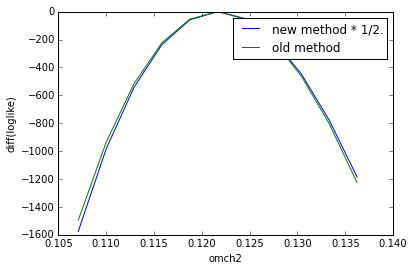

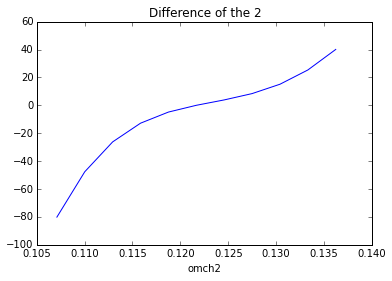

In [17]:
%run MH_MCMC_Jeff_1D_hacked.py
plt.show()

We see that the factor of 2 makes these 2 likelihood quite similar. I can't find the factor of 2 in my code (gnnn!!!), and I don't see how it could arise in the maths.

Just to check, if we really had missed a factor of 2, then we can rescale the previous test, but we see that we still don't have unit acceptance rate:

In [19]:
Likediff_Ji/2. - Likediff_ex

14.500952183734626